# Import dataset

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sn
import scipy as sy
import matplotlib as plt

In [2]:
fpath = r'C:\Users\Mei\Instacart Basket Analysis\02 Data\Prepared data'

In [33]:
df_merge_today = pd.read_pickle(os.path.join(fpath,'merge_final.pkl'))

In [39]:
df1 = df_merge_today

# Answers to key question 7

## 1. family status vs. products ordered during a week

In [53]:
group1 = df1.groupby(['family_status','order_day_of_week'])['product_id'].agg(['count']).stack().reset_index()

In [61]:
df_group = pd.DataFrame(group1)

In [64]:
df_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   family_status      28 non-null     object
 1   order_day_of_week  28 non-null     int64 
 2   level_2            28 non-null     object
 3   0                  28 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.0+ KB


In [73]:
df_group.set_index('order_day_of_week',inplace = True)

family_status
divorced/widowed                    AxesSubplot(0.125,0.11;0.775x0.77)
living with parents and siblings    AxesSubplot(0.125,0.11;0.775x0.77)
married                             AxesSubplot(0.125,0.11;0.775x0.77)
single                              AxesSubplot(0.125,0.11;0.775x0.77)
Name: 0, dtype: object

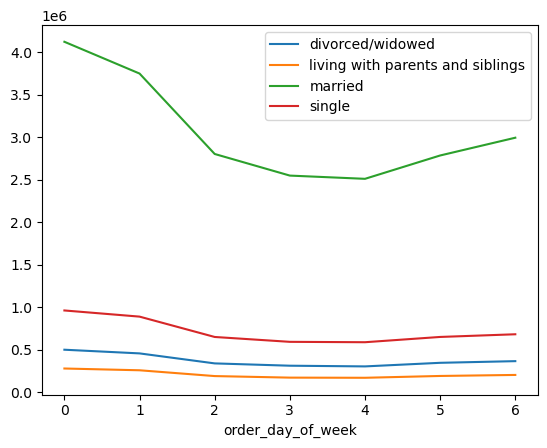

In [75]:
df_group.groupby('family_status')[0].plot(legend = True)

### Conclusions: 

1) For the group 'married', the amount of products ordered changes most obviously as the day changes.

2) For the group 'living with parents and siblings', the amount of products ordered changes least as the day changes.  

## 2. family status vs. order_hour_of_day

In [135]:
group2 = df1.groupby(['family_status','order_hour_of_day'])['product_id'].agg(['count']).stack().reset_index()

In [136]:
df_group2 = pd.DataFrame(group2)

In [137]:
df_group2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   family_status      96 non-null     object
 1   order_hour_of_day  96 non-null     int64 
 2   level_2            96 non-null     object
 3   0                  96 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 3.1+ KB


In [138]:
df_group2.set_index('order_hour_of_day', inplace = True)

family_status
divorced/widowed                    AxesSubplot(0.125,0.11;0.775x0.77)
living with parents and siblings    AxesSubplot(0.125,0.11;0.775x0.77)
married                             AxesSubplot(0.125,0.11;0.775x0.77)
single                              AxesSubplot(0.125,0.11;0.775x0.77)
Name: 0, dtype: object

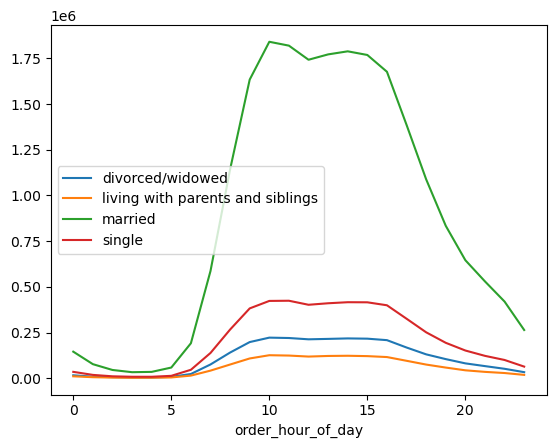

In [139]:
df_group2.groupby('family_status')[0].plot(legend = True)

## 3. gender vs. amount of products during a week

In [121]:
group5 = df1.groupby(['gender','order_day_of_week'])['product_id'].agg(['count']).stack().reset_index()

In [122]:
df_group5 = pd.DataFrame(group5)

In [123]:
df_group5.set_index('order_day_of_week', inplace = True)

gender
Female    AxesSubplot(0.125,0.11;0.775x0.77)
Male      AxesSubplot(0.125,0.11;0.775x0.77)
Name: 0, dtype: object

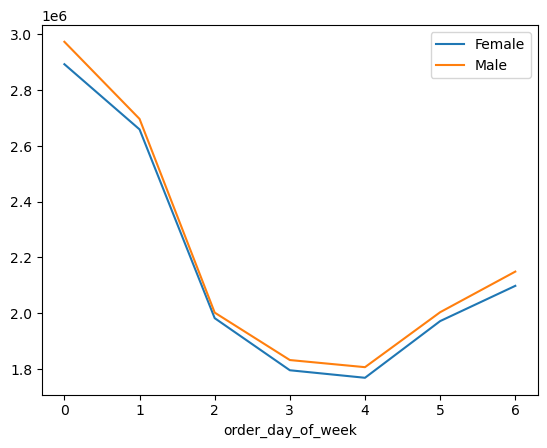

In [134]:
df_group5.groupby('gender')[0].plot(legend = True)

### Conclusions: The female customers order more products than the male customers by average everyday

# For key question 1: I have modified the figures

In [27]:
df_product =df_merge_today.groupby('order_day_of_week').agg({'product_id':['count']})

<AxesSubplot:xlabel='order_day_of_week'>

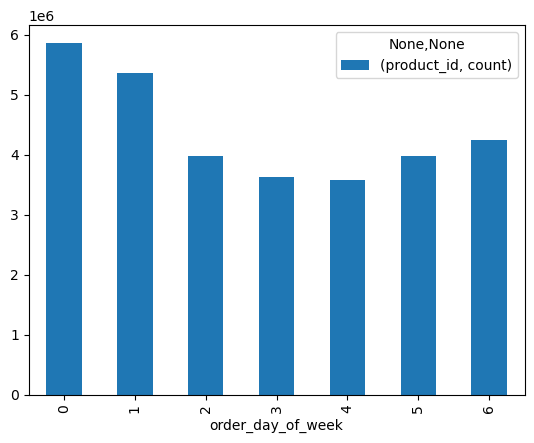

In [28]:
df_product.plot.bar()

In [25]:
df_product_hour = df_merge_today.groupby('order_hour_of_day').agg({'product_id':['count']})

<AxesSubplot:xlabel='order_hour_of_day'>

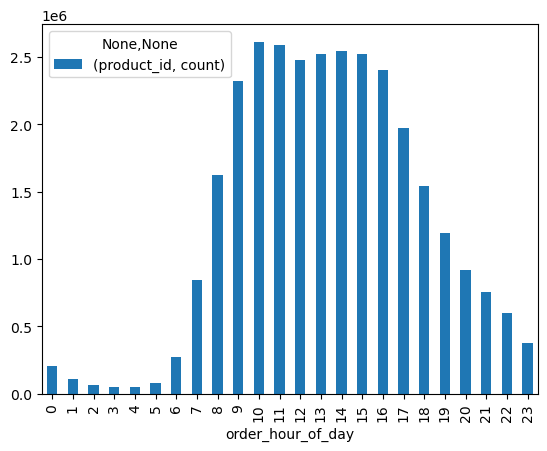

In [26]:
df_product_hour.plot.bar()